In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Problem Statement
### World Happiness Report Project
#### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

## You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


##### Observation of the RAW Data Avaiable
The Dataset contains the Country and Region wise details for Happiness Score. Dataset contains Numerical. "Happiness Score" is the Target variable which contains continuous data; hence Happiness Score predictions will be done by using Regression Models.

In [3]:
df1 = df
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
df.tail(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


###  EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df.shape

(158, 12)

The dataset contains 158 rows and 12 columns including the target vaiable "Happiness Rank".

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
cols=df.columns.tolist()

In [9]:
cols

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are Three(03) different datatypes as int64, float64 and object available in the dataset.

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

######  No null values are present in the dataset.
column with datatypes are as 

09 Nos.- float64 (including 01 No. target column - 'Happiness Score'); 

01 No. - int64; 

02 Nos. - object

<AxesSubplot:>

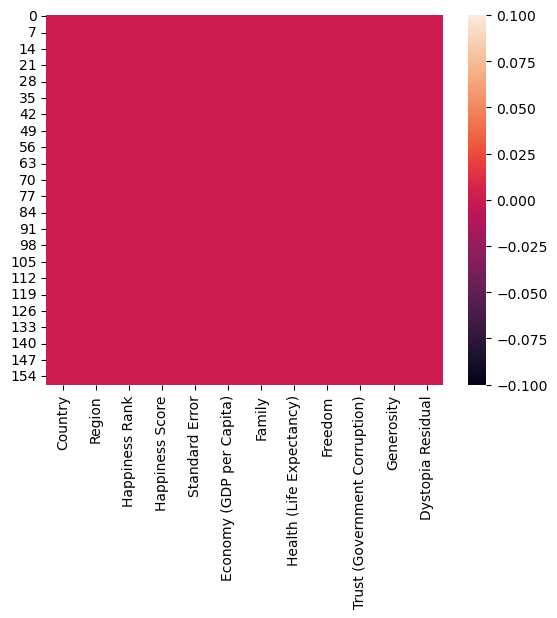

In [13]:
sns.heatmap(df.isnull())

In [14]:
# Split the columns into Categorical Column and Numerical Column.
categorical_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else :
        numerical_col.append(i)

In [15]:
print('Categorical Columns : ', categorical_col)
print('Numerical Columns : ', numerical_col)

Categorical Columns :  ['Country', 'Region']
Numerical Columns :  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [16]:
# Check number of Unique Values from each Column.
df.nunique().to_frame('No. of Unique Values')

,No. of Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


These are the columnwise Unique values from dataset.

In [17]:
# Check list of values in Target column 'Happiness Score'
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

Target Variable have all unique values.

###  Description of Dataset

In [18]:
# Statistical summary of columns with Numerical Data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Summary shows no negative/invalid values.

Observations based on Statistical Data :

1) Counts of all column are same (158), this shows no missing values in dataset.

2) The mean value is greater than the median(50%) in Standard Error, Trust (Government Corruption), Generosityand Dystopia Residual; hence data is skewed towards Right.

3) The mean value is less than the median(50%) in Economy (GDP per Capita),	Family,	Health (Life Expectancy), hence data is skewed towards Left.

4) The Mean Value and median(50%) is almost same for Happiness Rank, hence data is considered as normal and almost having standard deviation.

5) There is huge difference between 75% and max values of Standard Error column, Trust (Government Corruption) and Generosity column hence outliers are present in data.

In [19]:
# Check list of values in 'Happiness Rank' column
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

The Happiness Rank Column consists of series of number, this column shows the ranking based on 'Happiness Score' Column. Hence the column can be dropped.

In [20]:
df2 = df
df2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
df = df.drop('Happiness Rank', axis = 1)

In [22]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
# Check list of values in 'Country' column
df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

The Country Column doesnot contain any data other than the Country names. The overall data is unique, hence the said column can be dropped from the dataset.

In [24]:
df = df.drop('Country', axis = 1)

In [25]:
df

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
# Check list of values in 'Region' column
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [27]:
# Check list of values in 'Region' column
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

The counts of the region are distinct and not evenly distributed.

In [28]:
# Split the columns into Categorical Column and Numerical Column.
categorical_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else :
        numerical_col.append(i)

print('Categorical Columns : ', categorical_col)
print('Numerical Columns : ', numerical_col)

Categorical Columns :  ['Region']
Numerical Columns :  ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


### Data Visualization

#### Univariate Analysis

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


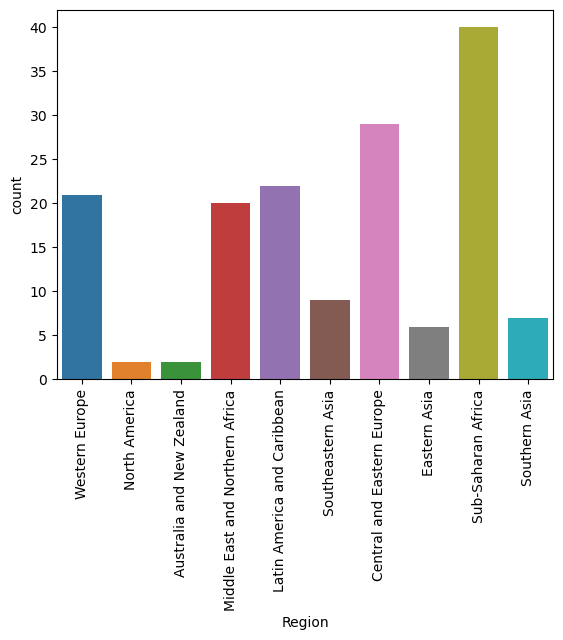

In [29]:
# Visualizing the count of Happiness Index performed, based on Region Column.

ax = sns.countplot(x='Region', data=df)
plt.xticks(rotation=90)

print(df['Region'].value_counts())
plt.show()

The Region wise count of Happiness index calculated is more for European and African regions when compared to other regions like Asia, America, Australia and New Zealand

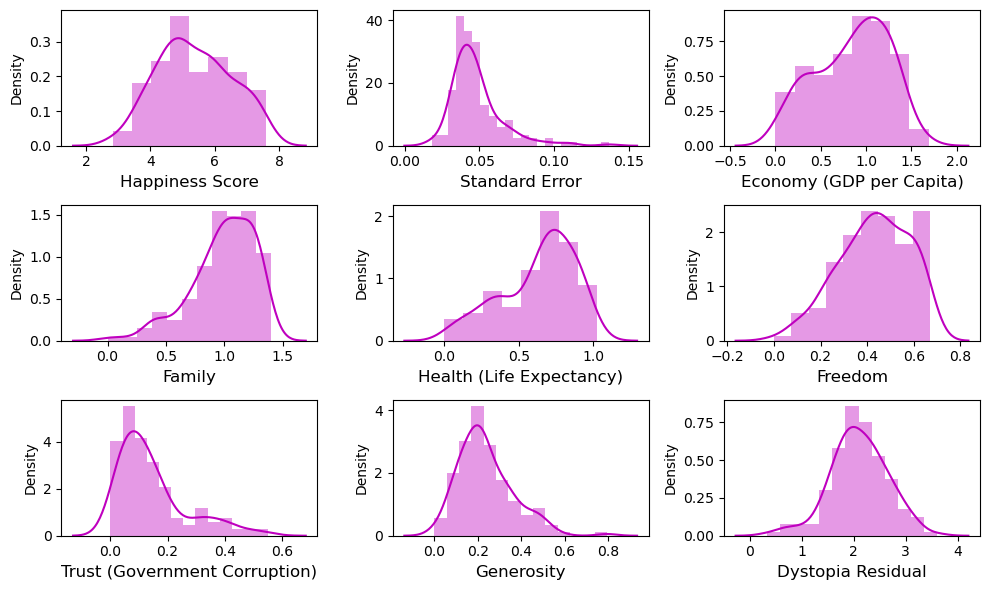

In [30]:
# lets check how the data is distributed for all columns.
plt.figure(figsize=(10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 9 :
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col], color ='m')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Obervations Based on distribution plots:

1) Data almost loooks normal in Happiness Score Column and Dystopia Residual, also have no skewness.

2) The data in Standard Error, Trust (Governement Corruption), Generosity columns are Skewed to Right.

3) The data in Economic (GDP per Capita), Family, Healty (Life Expectancy) and Freedom Columns are Skewed to Right.

#### Bivariate Analysis

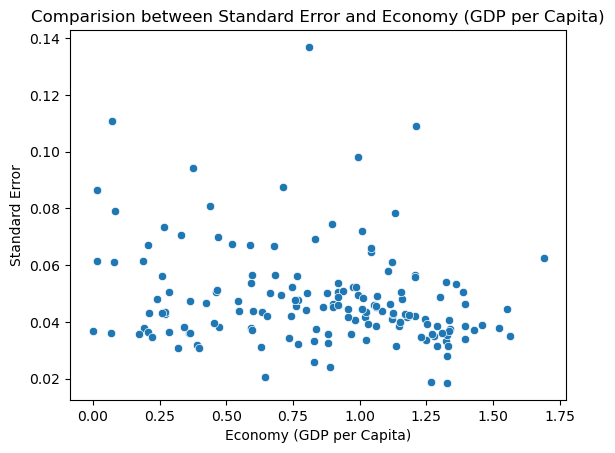

In [31]:
plt.title('Comparision between Standard Error and Economy (GDP per Capita)')
sns.scatterplot(x = 'Economy (GDP per Capita)', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Economy (GDP per Capita) have some relationships. For Higher Economy (GDP per Capita), Standard Error can be on lower side.

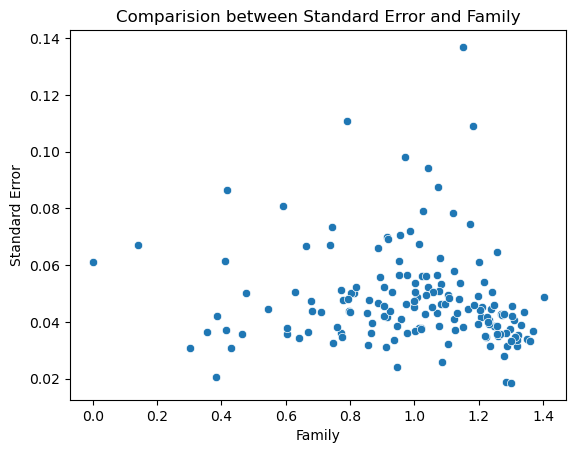

In [32]:
plt.title('Comparision between Standard Error and Family')
sns.scatterplot(x = 'Family', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Family have some relationships. For Higher Family, Standard Error is more certain to be on lower side.

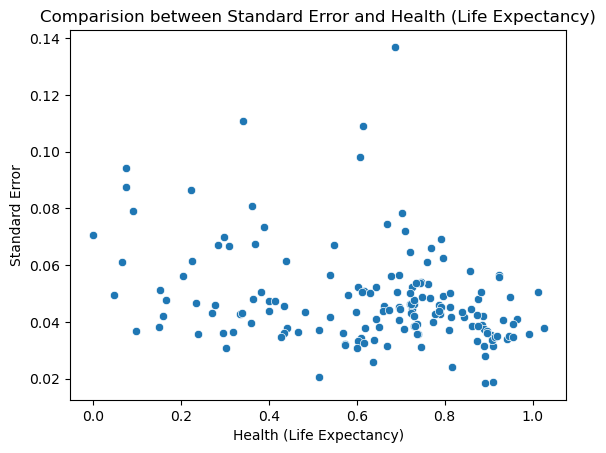

In [33]:
plt.title('Comparision between Standard Error and Health (Life Expectancy)')
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Health (Life Expectancy) have some relationships. For Higher Health (Life Expectancy), Standard Error is on lower side.

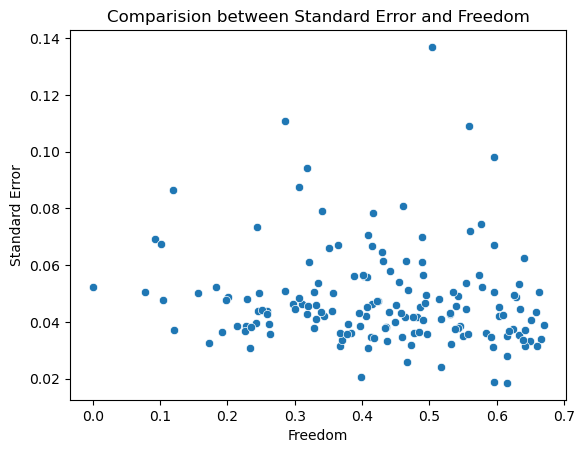

In [34]:
plt.title('Comparision between Standard Error and Freedom')
sns.scatterplot(x = 'Freedom', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Freedom have some relationships. For Higher Freedom, Standard Error mostly is on lower side.

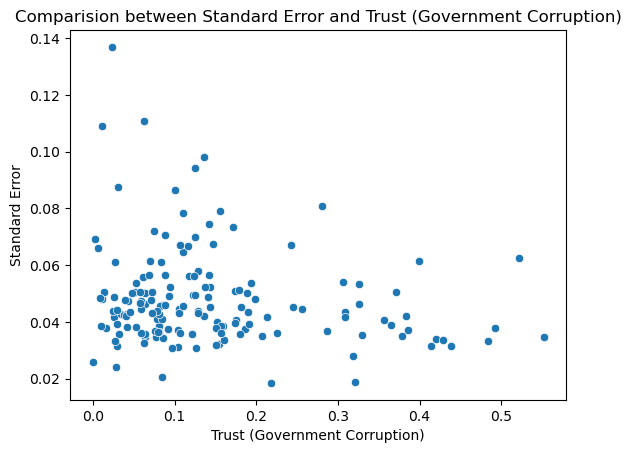

In [35]:
plt.title('Comparision between Standard Error and Trust (Government Corruption)')
sns.scatterplot(x = 'Trust (Government Corruption)', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Trust (Government Corruption) have some relationships. For Lower Trust (Government Corruption), Standard Error is mostly on lower side.

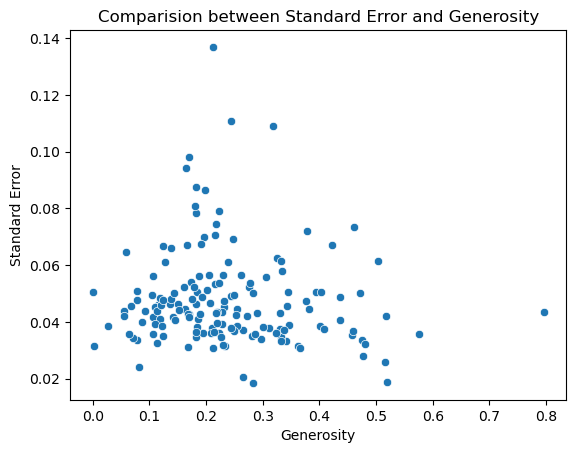

In [36]:
plt.title('Comparision between Standard Error and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Generosity have some relationships. For Lower Generosity, Standard Error is tend to be on lower side

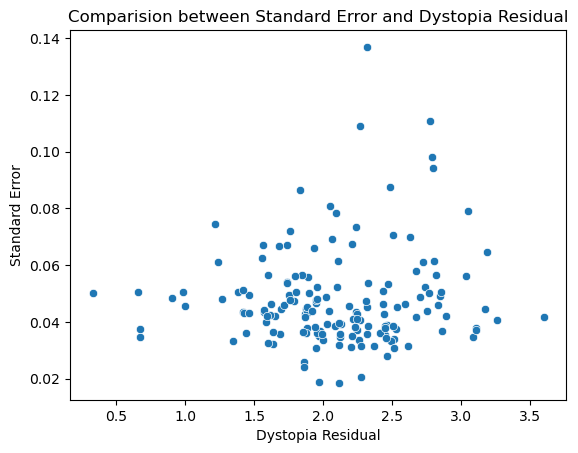

In [37]:
plt.title('Comparision between Standard Error and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

The Columns Standard Error and Dystopia Residual have some relationships. For average Dystopia Residual, Standard Error is nearly on lower side

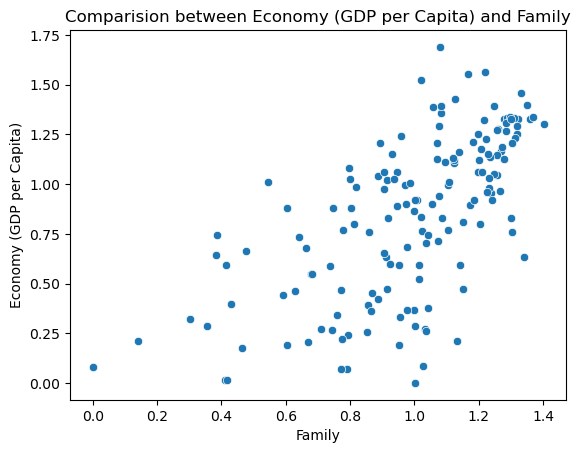

In [38]:
plt.title('Comparision between Economy (GDP per Capita) and Family')
sns.scatterplot(x = 'Family', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Family have Linear relationship.

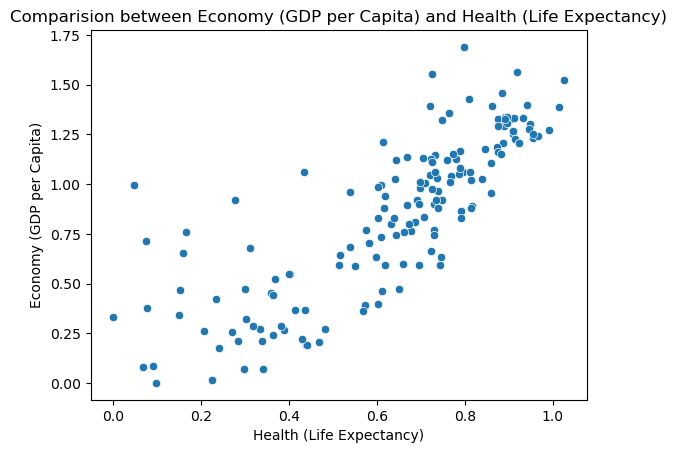

In [39]:
plt.title('Comparision between Economy (GDP per Capita) and Health (Life Expectancy)')
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Health (Life Expectancy) have Linear relationship.

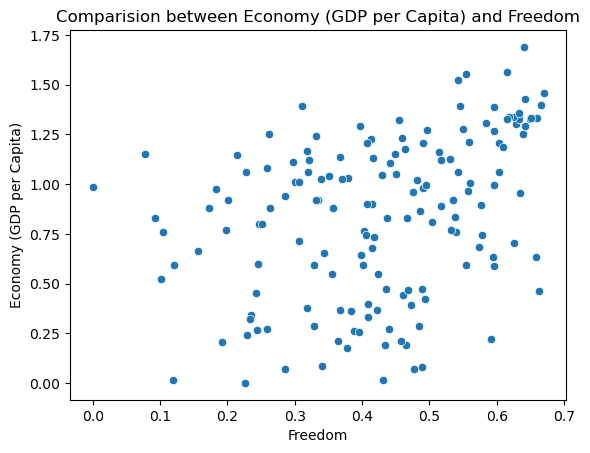

In [40]:
plt.title('Comparision between Economy (GDP per Capita) and Freedom')
sns.scatterplot(x = 'Freedom', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Freedom have almost Linear relationship.

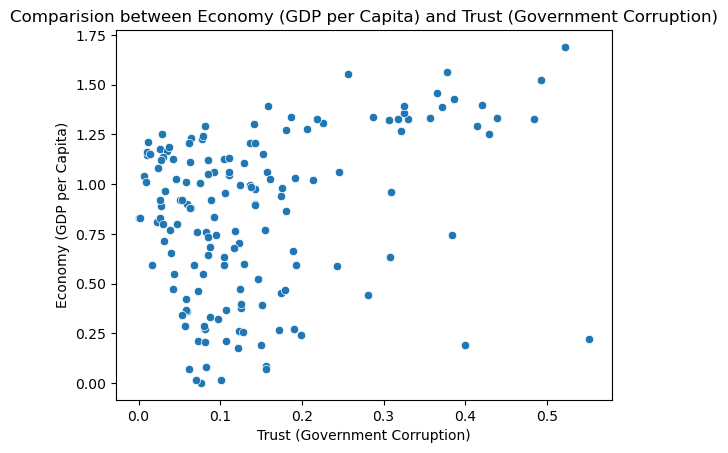

In [41]:
plt.title('Comparision between Economy (GDP per Capita) and Trust (Government Corruption)')
sns.scatterplot(x = 'Trust (Government Corruption)', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Health (Life Expectancy) have some relationship. For Lower Trust (Government Corruption), Economy (GDP per Capita) is mostly on higher side.

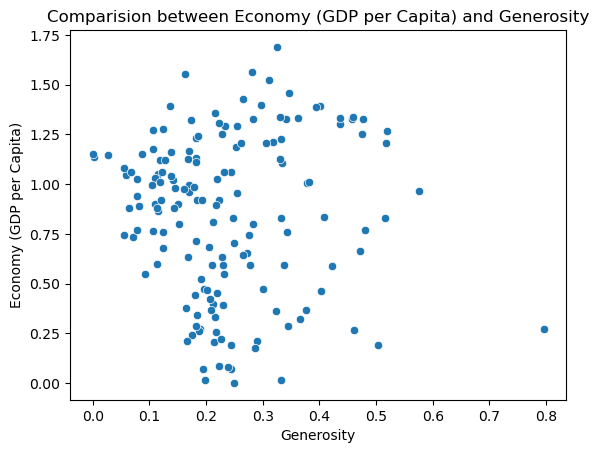

In [42]:
plt.title('Comparision between Economy (GDP per Capita) and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Generosity nearly Linear relationship.

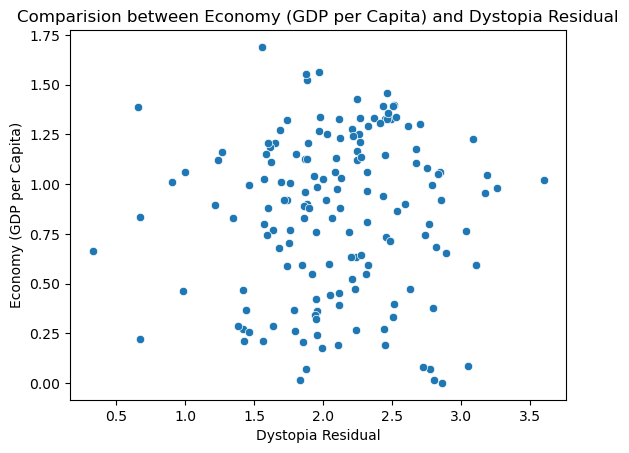

In [43]:
plt.title('Comparision between Economy (GDP per Capita) and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Economy (GDP per Capita)', data = df, palette = 'bright')
plt.show()

The Columns Economy (GDP per Capita) and Dystopia Residual nearly Linear relationship.

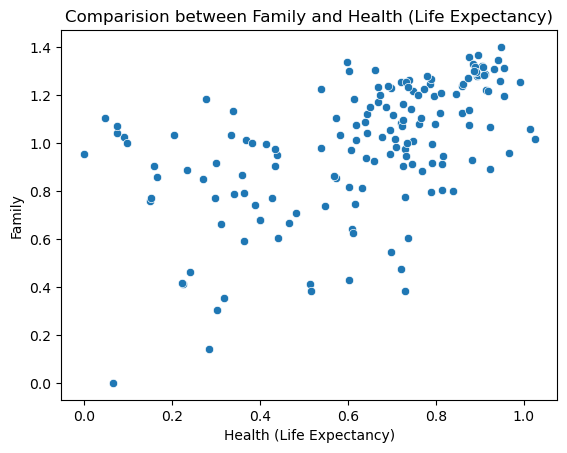

In [44]:
plt.title('Comparision between Family and Health (Life Expectancy)')
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Family', data = df, palette = 'bright')
plt.show()

The Columns Family and Health (Life Expectancy) have Linear relationship.

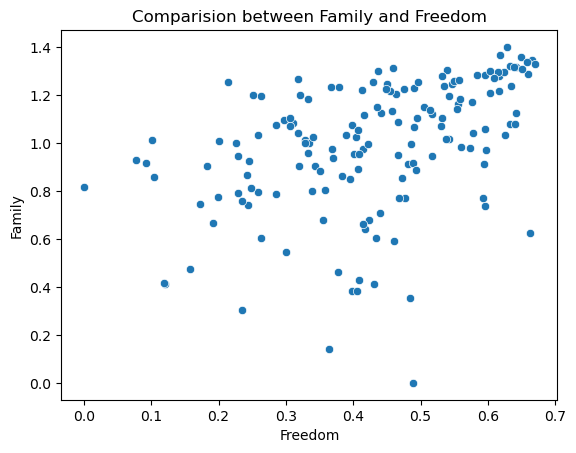

In [45]:
plt.title('Comparision between Family and Freedom')
sns.scatterplot(x = 'Freedom', y = 'Family', data = df, palette = 'bright')
plt.show()

The Columns Family and Freedom have Linear relationship.

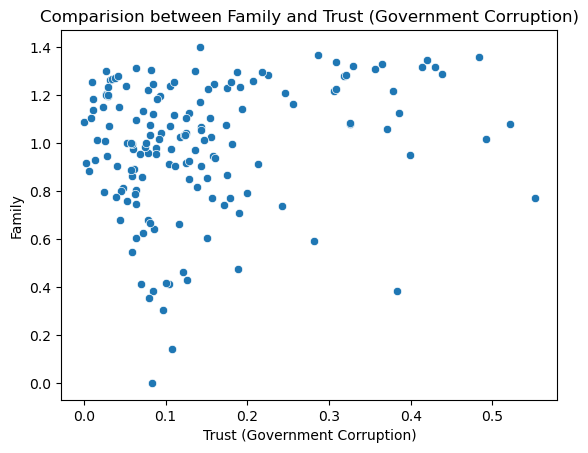

In [46]:
plt.title('Comparision between Family and Trust (Government Corruption)')
sns.scatterplot(x = 'Trust (Government Corruption)', y = 'Family', data = df, palette = 'bright')
plt.show()

The Columns Family and Trust (Government Corruption) have Linear relationship.

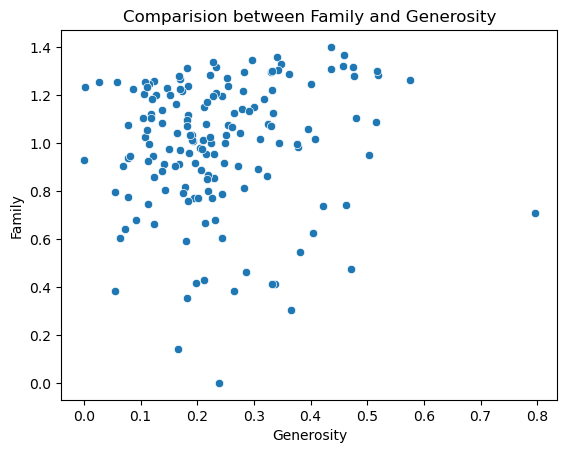

In [47]:
plt.title('Comparision between Family and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Family', data = df, palette = 'bright')
plt.show()

The Columns Family and Generosity have some relationship. For Lower Generosity, Family have higher values.

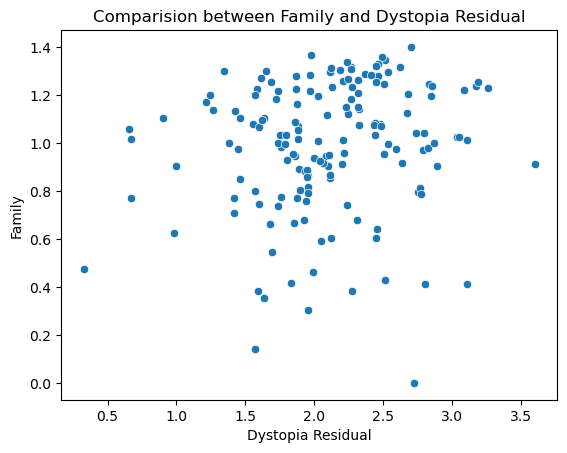

In [48]:
plt.title('Comparision between Family and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Family', data = df, palette = 'bright')
plt.show()

The Columns Family and Dystopia Residual have Linear relationship.

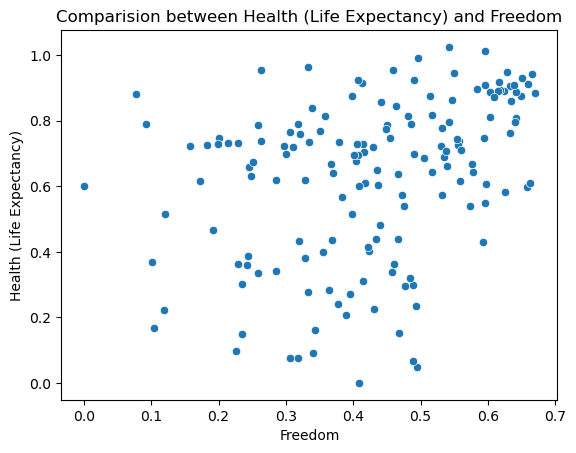

In [49]:
plt.title('Comparision between Health (Life Expectancy) and Freedom')
sns.scatterplot(x = 'Freedom', y = 'Health (Life Expectancy)', data = df, palette = 'bright')
plt.show()

The Columns Health (Life Expectancy) and Freedom have Linear relationship.

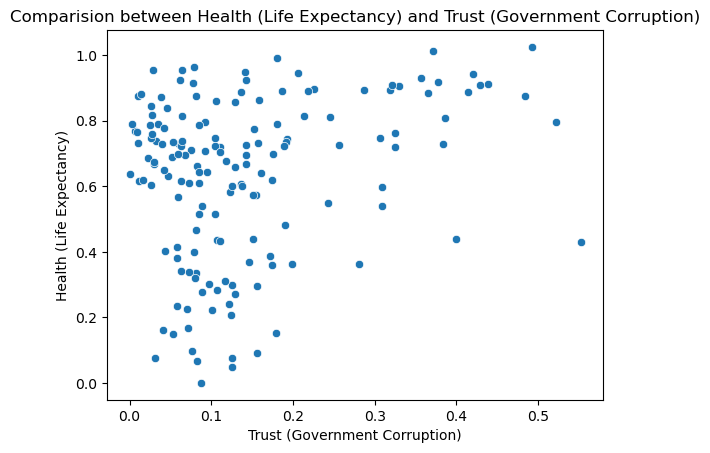

In [50]:
plt.title('Comparision between Health (Life Expectancy) and Trust (Government Corruption)')
sns.scatterplot(x = 'Trust (Government Corruption)', y = 'Health (Life Expectancy)', data = df, palette = 'bright')
plt.show()

The Columns Health (Life Expectancy) and Trust (Government Corruption) have Linear relationship.

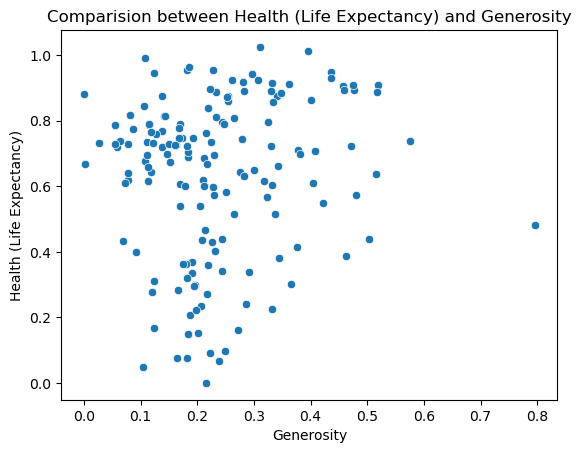

In [51]:
plt.title('Comparision between Health (Life Expectancy) and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Health (Life Expectancy)', data = df, palette = 'bright')
plt.show()

The Columns Health (Life Expectancy) and Generosity have Linear relationship.

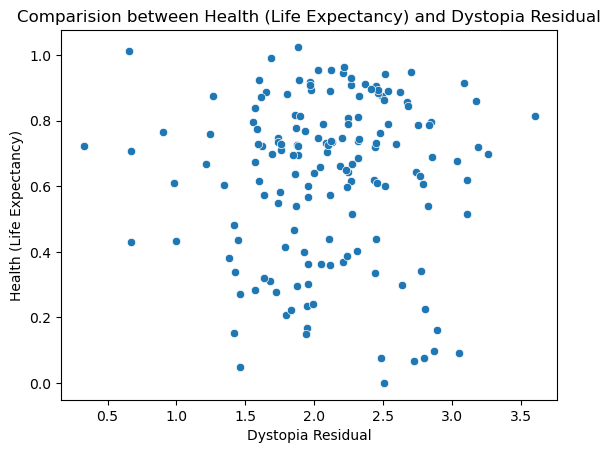

In [52]:
plt.title('Comparision between Health (Life Expectancy) and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Health (Life Expectancy)', data = df, palette = 'bright')
plt.show()

The Columns Health (Life Expectancy) and Dystopia Residual have Linear relationship.

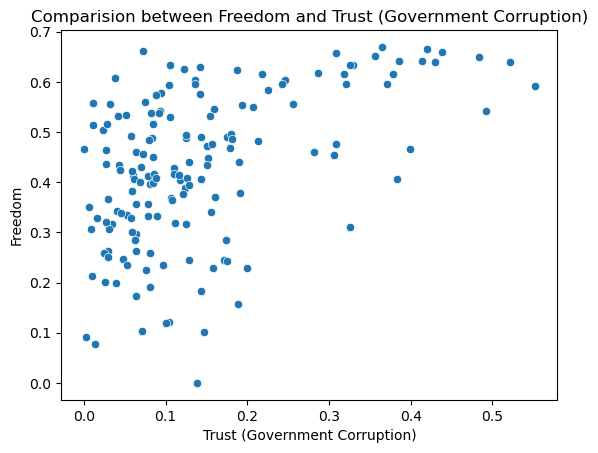

In [53]:
plt.title('Comparision between Freedom and Trust (Government Corruption)')
sns.scatterplot(x = 'Trust (Government Corruption)', y = 'Freedom', data = df, palette = 'bright')
plt.show()

The Columns Freedom and Trust (Government Corruption) have Linear relationship.

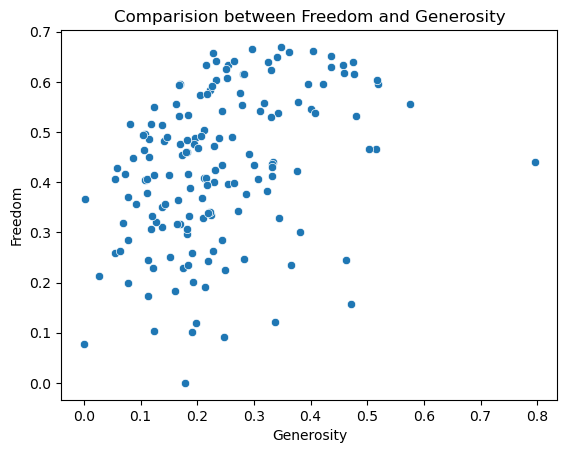

In [54]:
plt.title('Comparision between Freedom and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Freedom', data = df, palette = 'bright')
plt.show()

The Columns Freedom and Generosity have Linear relationship.

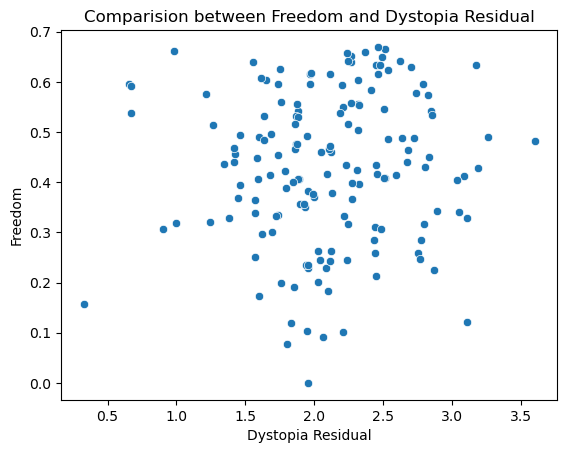

In [55]:
plt.title('Comparision between Freedom and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Freedom', data = df, palette = 'bright')
plt.show()

The Columns Freedom and Dystopia Residual have Linear relationship.

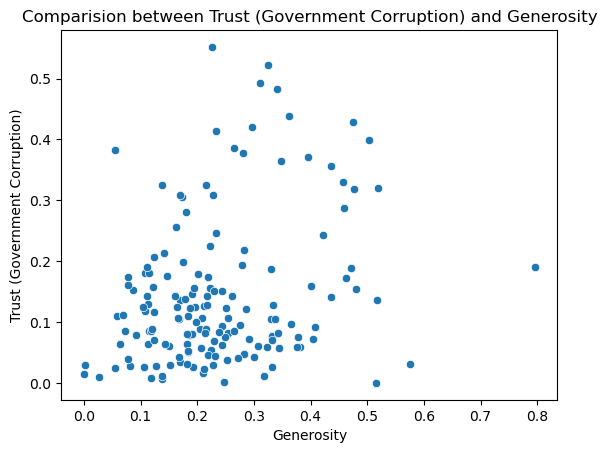

In [56]:
plt.title('Comparision between Trust (Government Corruption) and Generosity')
sns.scatterplot(x = 'Generosity', y = 'Trust (Government Corruption)', data = df, palette = 'bright')
plt.show()

The Columns Trust (Government Corruption) and Generosity have some relationship. For lower Generosity, Trust (Government Corruption) tends to be on lower side.

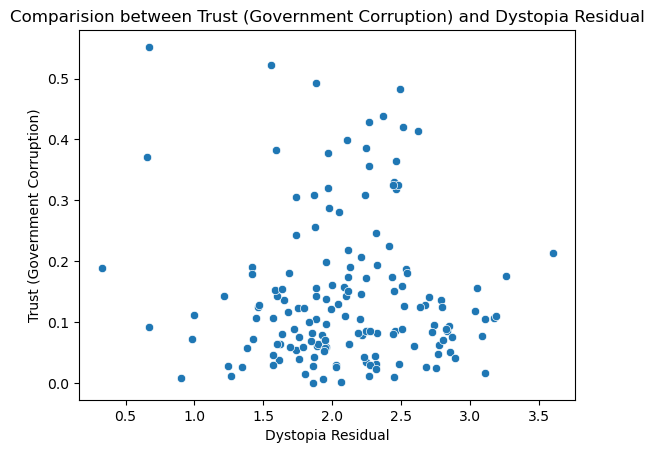

In [57]:
plt.title('Comparision between Trust (Government Corruption) and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Trust (Government Corruption)', data = df, palette = 'bright')
plt.show()

The Columns Trust (Government Corruption) and Dystopia Residual have Linear relationship.

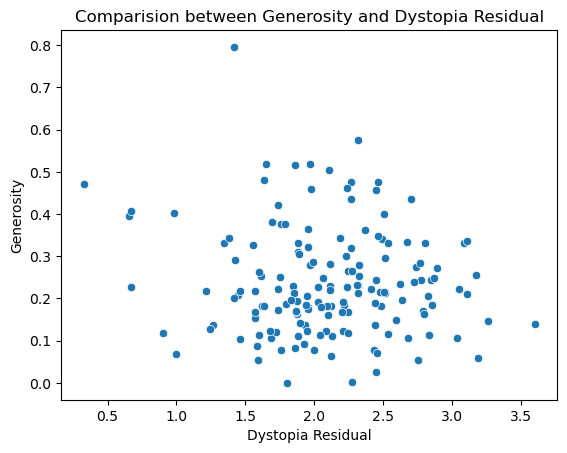

In [58]:
plt.title('Comparision between Generosity and Dystopia Residual')
sns.scatterplot(x = 'Dystopia Residual', y = 'Generosity', data = df, palette = 'bright')
plt.show()

The Columns Generosity and Dystopia Residual have Linear relationship.

###  Multivariate Analysis.

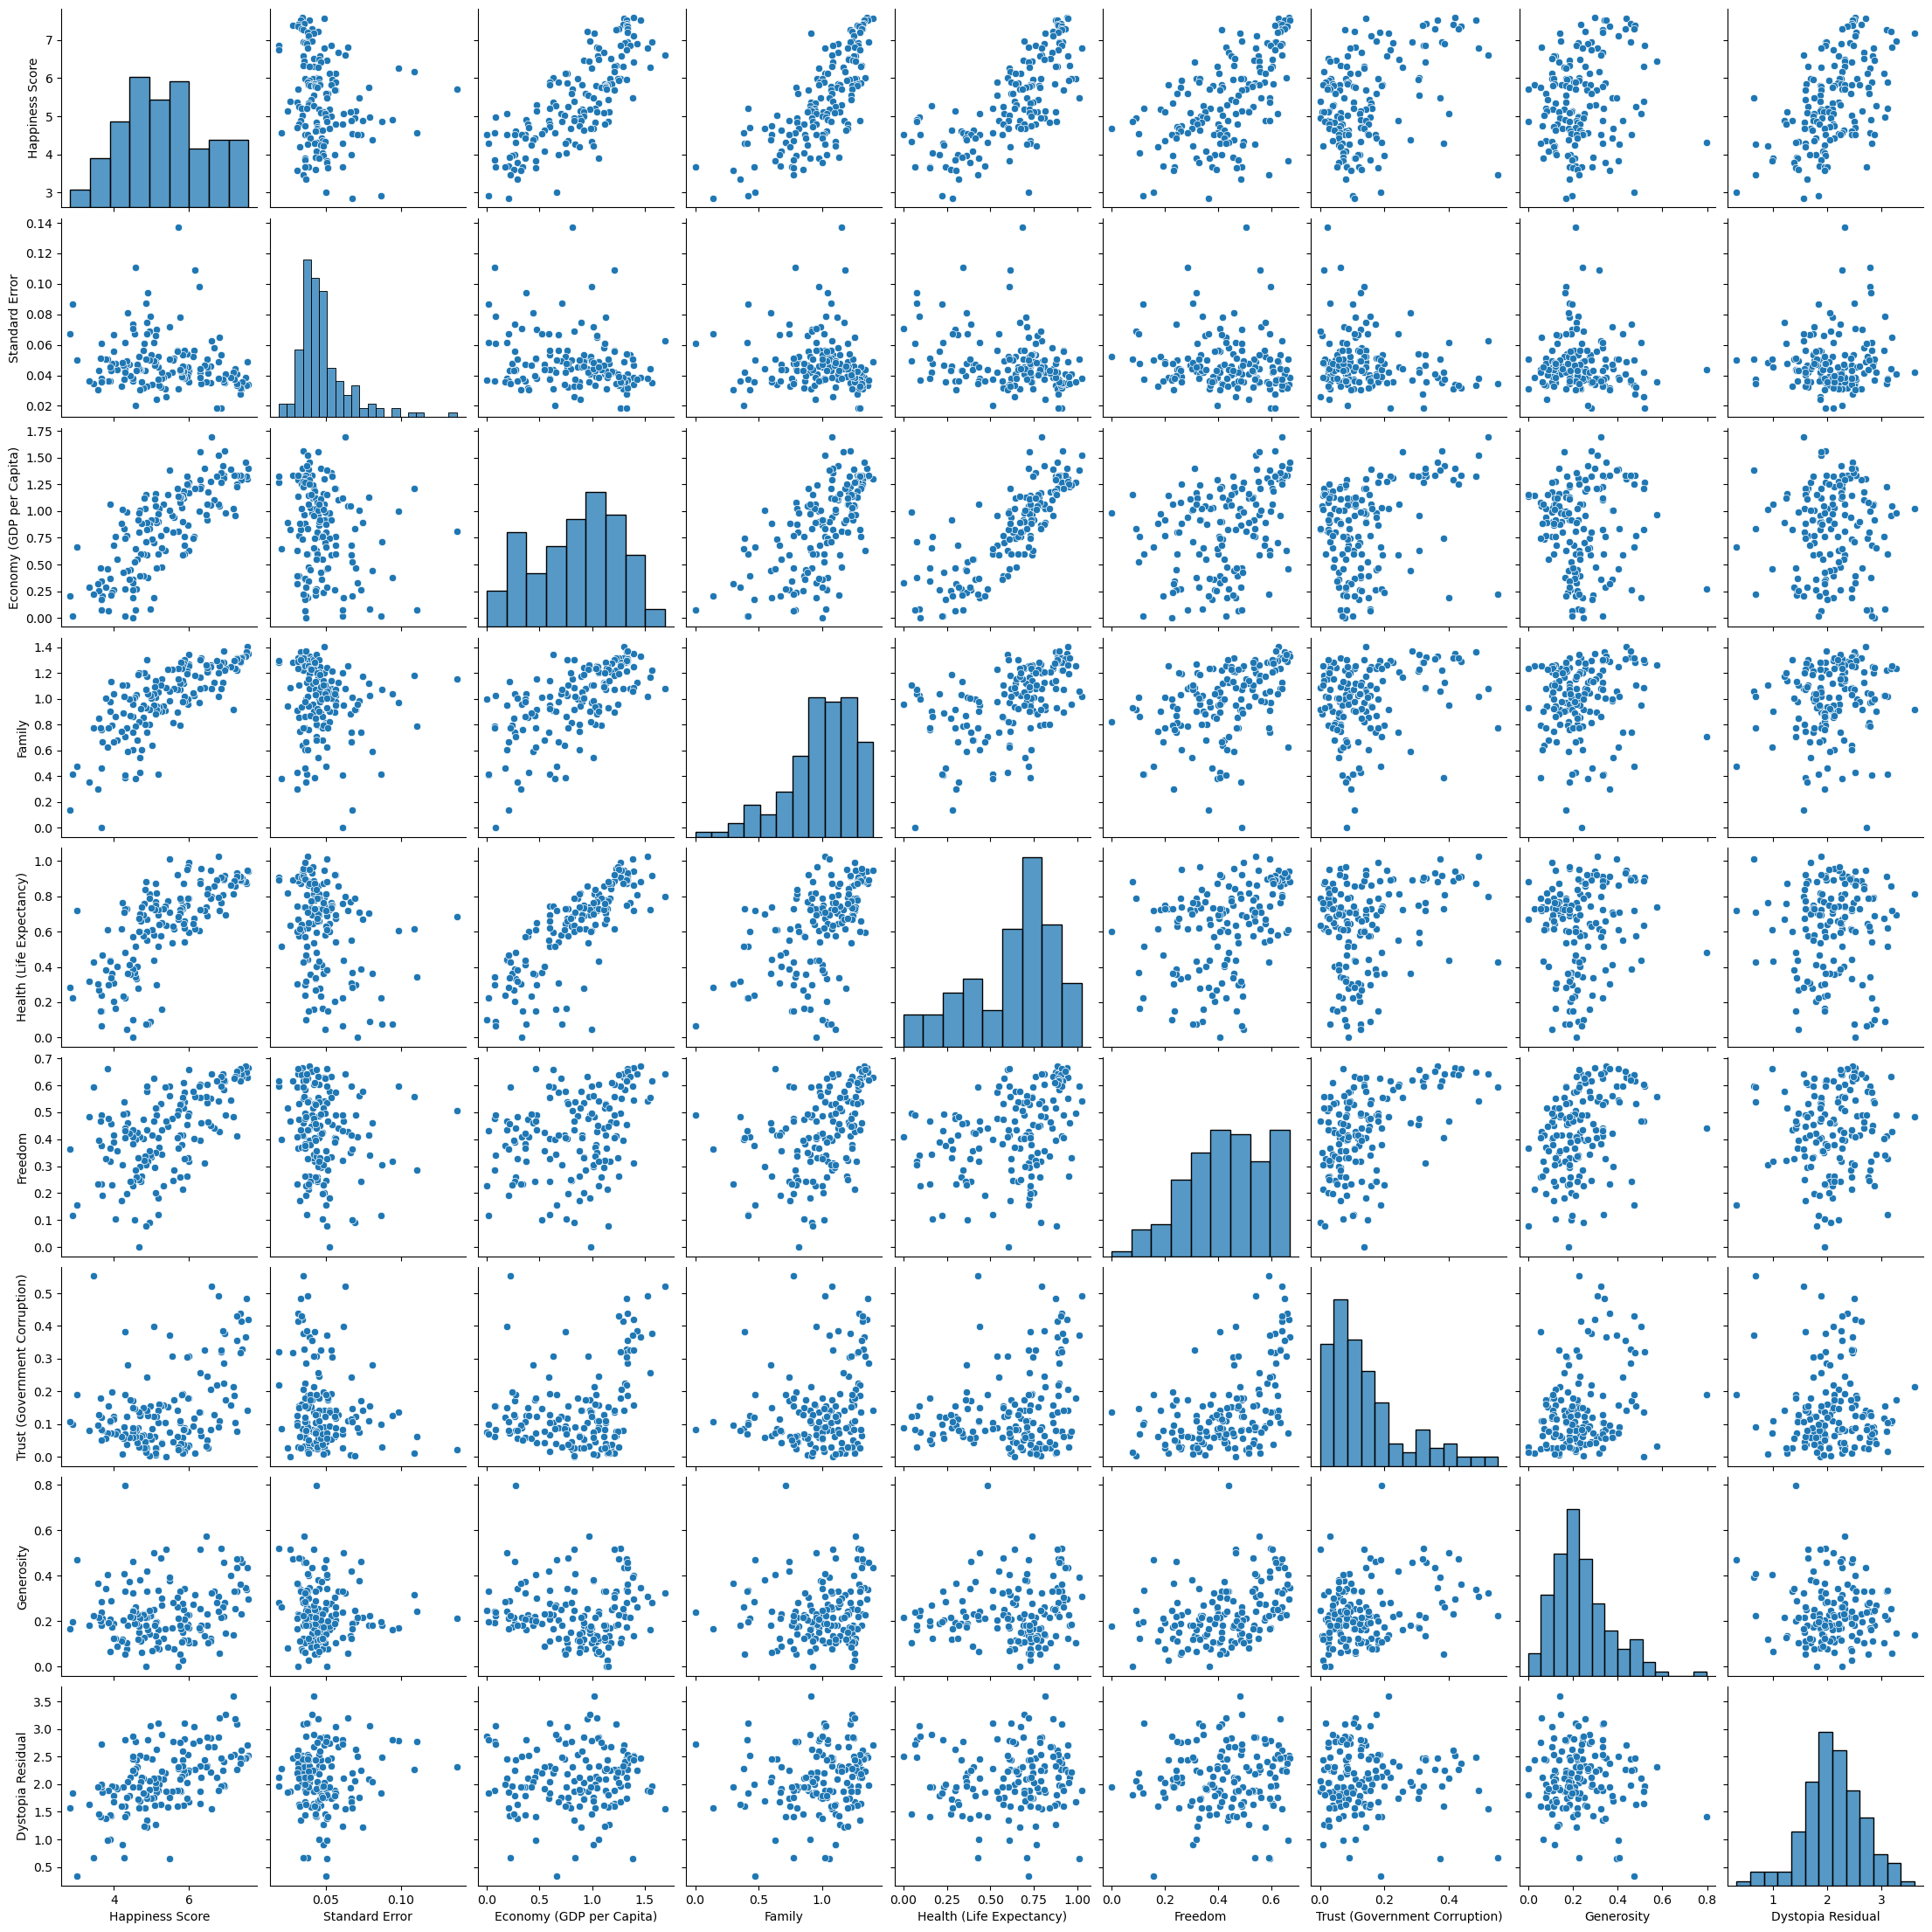

In [59]:
sns.pairplot(df, palette = 'Dark2')

plt.show()

1) All of the features have some relationships with every columns.

2) Happyness Score Colmun have strong relationships with all columns.

3) Data seems may have Outliers

### Checking Outliers.

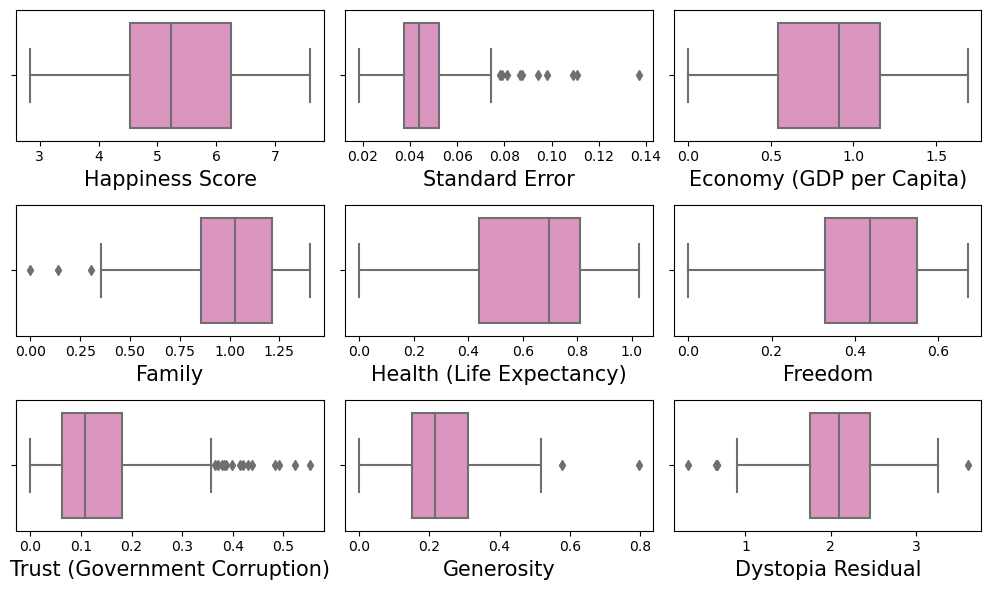

In [60]:
# lets check Outliers with help of BOX Plot.
plt.figure(figsize=(10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 9 :
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col], palette = 'Set2_r')
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Columns Standard Error, Family, Trust (Government Corruption), Generosity and Dystopia Residual have Outliers.

In [61]:
# Column name with Spaces will have issue while executing. Remove spaces from column name.
df.columns = df.columns.str.replace(' ','')
df

,Region,HappinessScore,StandardError,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [62]:
# Column name with Brackets will have issue while executing. Remove Brackets from column name.
df.columns = df.columns.str.replace('(','')
df

,Region,HappinessScore,StandardError,EconomyGDPperCapita),Family,HealthLifeExpectancy),Freedom,TrustGovernmentCorruption),Generosity,DystopiaResidual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [63]:
# Column name with Brackets will have issue while executing. Remove Brackets from column name.
df.columns = df.columns.str.replace(')','')
df

,Region,HappinessScore,StandardError,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,TrustGovernmentCorruption,Generosity,DystopiaResidual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [67]:
# Find IQR (Inter Quartile Range) to identify outliers.
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [68]:
q1

HappinessScore               4.526000
StandardError                0.037268
EconomyGDPperCapita          0.545808
Family                       0.856823
HealthLifeExpectancy         0.439185
Freedom                      0.328330
TrustGovernmentCorruption    0.061675
Generosity                   0.150553
DystopiaResidual             1.759410
Name: 0.25, dtype: float64

In [69]:
q3

HappinessScore               6.243750
StandardError                0.052300
EconomyGDPperCapita          1.158448
Family                       1.214405
HealthLifeExpectancy         0.811013
Freedom                      0.549092
TrustGovernmentCorruption    0.180255
Generosity                   0.309883
DystopiaResidual             2.462415
Name: 0.75, dtype: float64